## Dimensionality Reduction

### Principal Component Analysis
Out of the $m$ independent variables, PCA selects $n < m$ new independent variables that explain the most variance **regardless of the dependent variable.** 
Since dependent variable is not considered, PCA is an unsupervised model. 

Numerical --> continuous, discreate

Categorical --> nominal, ordinal

--> yes/no

--> 400, 200, 250, 150

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/diabetes.csv', sep = ',')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


single class-> 1/0

multi class - drug -> drugx,drugy,drugz

multi label class --> comedy, horror

1. KNN
2. Logistic
3. SVC
4. Decision
5. Random Forest

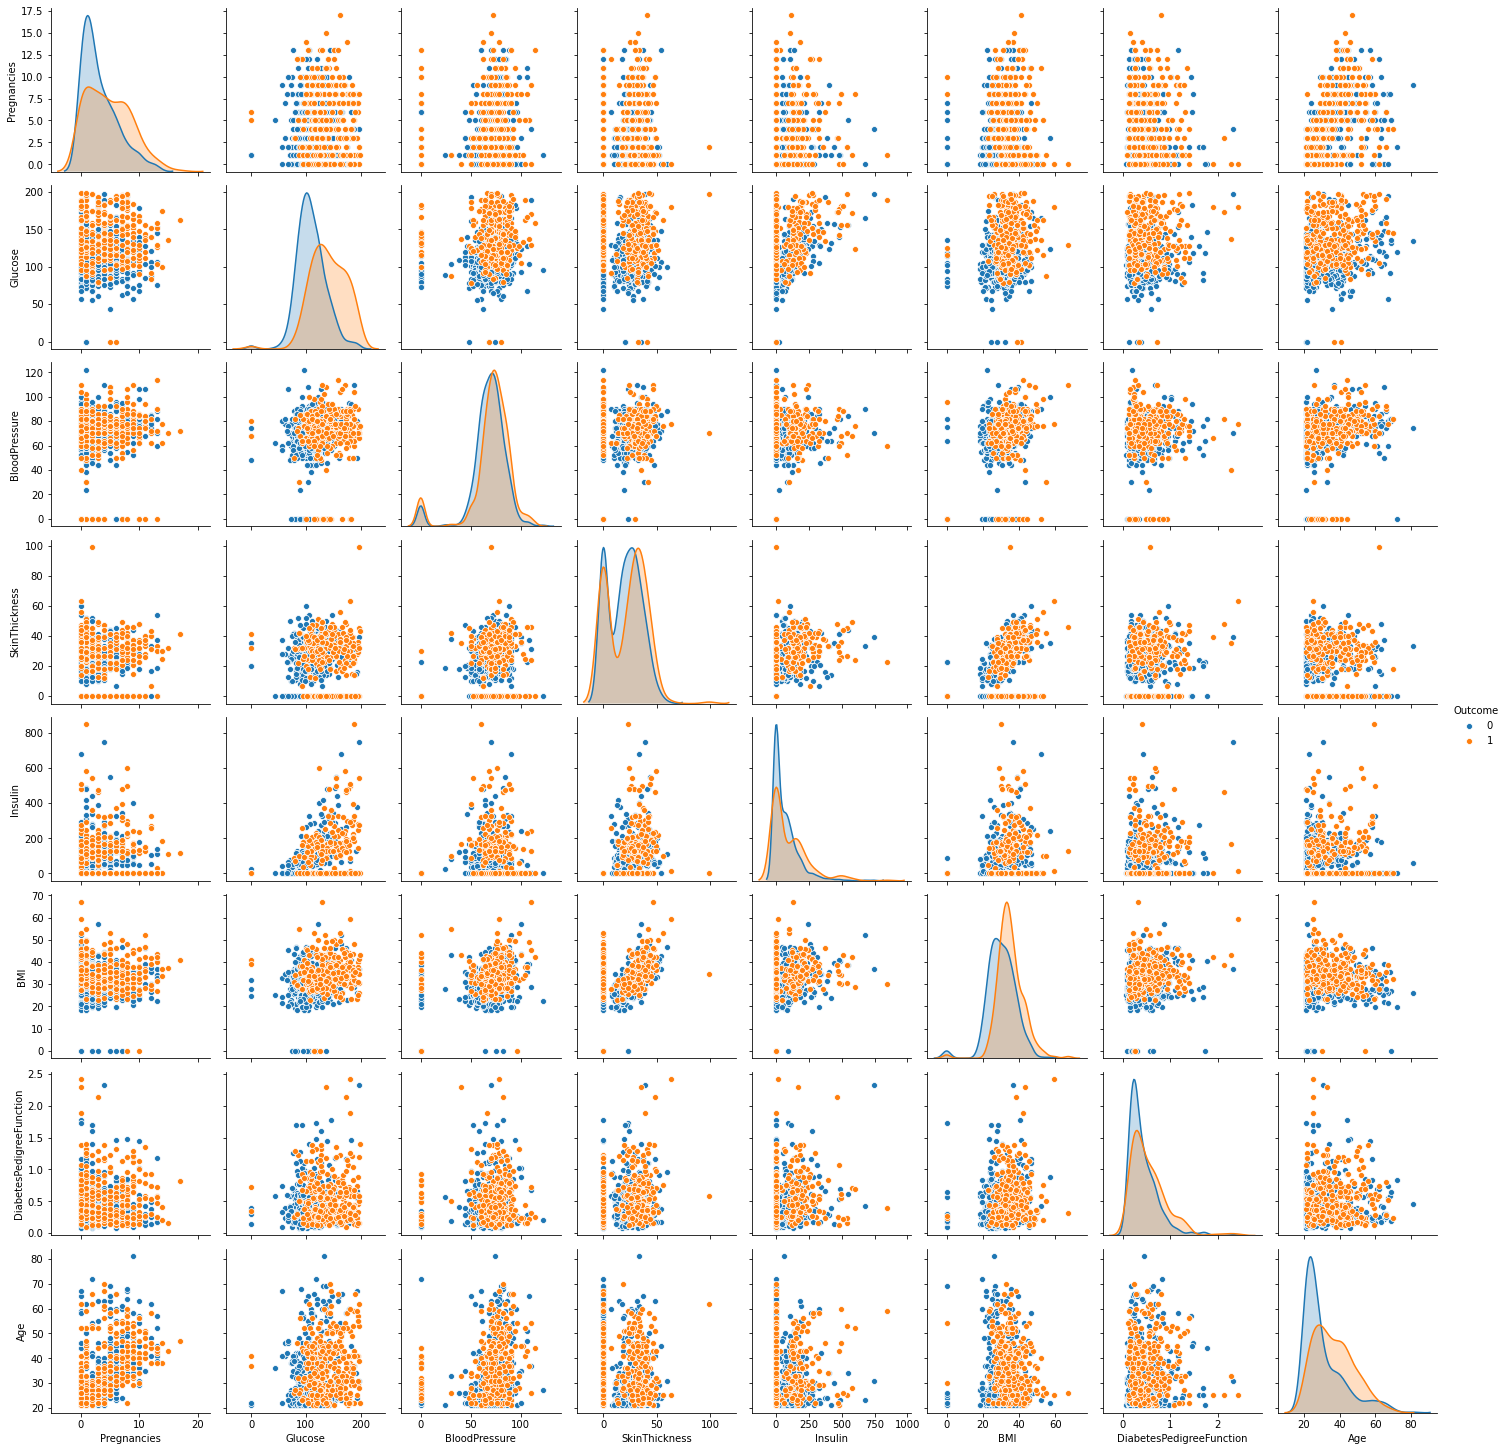

In [8]:
import seaborn as sns

sns.pairplot(df,hue = 'Outcome')

## Logistic Regression

In [9]:
X = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [10]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 7)

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\Jesus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[127,  20],
       [ 37,  47]], dtype=int64)

In [14]:
clf.score(X_test, y_test)

0.7532467532467533

In [15]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3,random_state = 42)

In [16]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
204,6,103,72,32,190,37.7,0.324,55
97,1,71,48,18,76,20.4,0.323,22
336,0,117,0,0,0,33.8,0.932,44


In [17]:
# Always scale data for good results on PCA
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [18]:
X_train[0:5,:]

array([[ 1.23168349, -0.43604825,  0.56160593, -1.28775566, -0.69294238,
        -0.93586599,  1.15656737,  0.06294811],
       [ 0.93510248,  0.47024091,  1.07773825, -1.28775566, -0.69294238,
        -0.26437369, -0.79299869,  1.4242287 ],
       [ 0.63852147, -0.56105365,  0.14870008,  0.71926405,  0.95559722,
         0.72386024, -0.44895762,  1.84962888],
       [-0.84438358, -1.56109686, -1.09001747, -0.15880707, -0.03352654,
        -1.46799195, -0.45197552, -0.95801234],
       [-1.14096459, -0.12353475, -3.56745259, -1.28775566, -0.69294238,
         0.22974327,  1.38592809,  0.91374848]])

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.26171944 0.21677862 0.128557   0.10958539 0.09494264 0.08534802
 0.05253743 0.05053145]


In [20]:
# Extract top 2 principal components
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.26171944 0.21677862]


In [21]:
X_train

array([[-0.78397591,  1.34563612],
       [-0.23714761,  2.44484824],
       [ 1.21249591,  0.96614483],
       ...,
       [ 1.85090101,  0.80663508],
       [-1.74219774, -0.89044531],
       [-1.38214951, -0.25137068]])

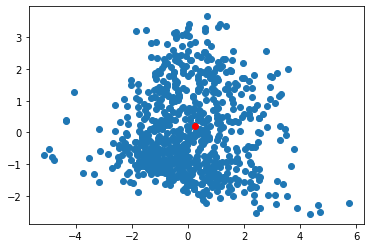

In [22]:
plt.scatter(X_train[:,0],X_train[:,1])
plt.scatter(explained_variance[0],explained_variance[1],c = 'r')
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred = clf.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[3]], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0